Importing relevant libraries needed for the execution of the project

In [1]:
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### 1. Reading the provided data with the CSV library

In [2]:
"""I decided to read in the data with csv.DictReader because I want the resulting variable to be a dictionary rather than 
a regular csv data. The DictReader creates an object that operates like a regular reader but maps the information in each 
row to a dictionary whose keys(the header) are given. I looped through all the entries, appending them to a list type variable 
which returns a list of dictionaries, where the information contain in each dictionary represents a single person (row)"""

csv_list = []
with open("acw_user_data.csv", "r") as csv_file:
    csv_dict = csv.DictReader(csv_file, delimiter = ",")
    for person in csv_dict:
        csv_list.append(person)

In [3]:
# This cell shows what the list of dictionaries look like, each dictionary represent a single entry(row)
# note, this is just the first entry
csv_list[0]

{'Address Street': '70 Lydia isle',
 'Address City': 'Lake Conor',
 'Address Postcode': 'S71 7XZ',
 'Age (Years)': '89',
 'Distance Commuted to Work (miles)': '0',
 'Employer Company': 'N/A',
 'Credit Card Start Date': '08/18',
 'Credit Card Expiry Date': '11/27',
 'Credit Card Number': '676373692463',
 'Credit Card CVV': '875',
 'Dependants': '3',
 'First Name': 'Kieran',
 'Bank IBAN': 'GB62PQKB71416034141571',
 'Last Name': 'Wilson',
 'Marital Status': 'married or civil partner',
 'Yearly Pension (GBP)': '7257',
 'Retired': 'True',
 'Yearly Salary (GBP)': '72838',
 'Sex': 'Male',
 'Vehicle Make': 'Hyundai',
 'Vehicle Model': 'Bonneville',
 'Vehicle Year': '2009',
 'Vehicle Type': 'Pickup'}

#### 2. Converting the flat structures into nested structures

In [4]:
# the split() function takes in a string and splits it into individual word with the seperator being the space between them
# It return either the last two words or the last word depending on the condition given
def split(x):
    y = x.split(" ")
    if len(y) == 4:
        return " ".join([y[-2], y[-1]])
    else:
        return y[-1]

# the nested() function index the first parameter on the second
def nested(i, x):
    return x[i]

"""the attributes functions takes 5,4, and 3 parameters, and return a dictionary where the key of each parameter is a split()
function of it and the value is a nested() function of it. Each attribute function is the nested structure to be created"""
# I needed to cast the integer type on parameter x and y in the Card_attribute function to represent their true basic types
# note, I used x and y because I know I will pass in the "Credit Card Number" and "Credit Card CVV" in that position

def card_attributes(v,w,x,y,z):
    return {split(v) : nested(v, person), split(w) : nested(w, person), split(x) : int(nested(x, person)), 
            split(y) : int(nested(y, person)), split(z) : nested(z, person)}

def vehicle_attributes(w,x,y,z):
    return {split(w) : nested(w, person), split(x) : nested(x, person), split(y) : nested(y, person), 
            split(z) : nested(z, person)}

def address_attributes(w,x,y):
    return {split(w) : nested(w, person), split(x) : nested(x, person), split(y) : nested(y, person)}


In [5]:
# this cell loops through each person(row) in the csv_list, creating three new items into the dictionary
# the new items has a nested dictionary has a value using the attributes functions created above

for person in csv_list:
    
    person["Vehicle"] = vehicle_attributes("Vehicle Make", "Vehicle Model", "Vehicle Year", "Vehicle Type")
    person["Card"] = card_attributes("Credit Card Start Date", "Credit Card Expiry Date", "Credit Card Number", 
                                     "Credit Card CVV", "Bank IBAN")
    person["Address"] = address_attributes("Address Street", "Address City", "Address Postcode")
    
# since all the entries are in string type, there is a need to convert those attribute that are not string into there original types    
    person["Age (Years)"] = int(person["Age (Years)"])
    person["Yearly Salary (GBP)"] = int(person["Yearly Salary (GBP)"])
    person["Yearly Pension (GBP)"] = int(person["Yearly Pension (GBP)"])
    person["Distance Commuted to Work (miles)"] = float(person["Distance Commuted to Work (miles)"])
    person["Retired"] = eval(person["Retired"])
    
# the "pop" method removes the existing items in each row that has been nested in the new items    
    person.pop("Credit Card Start Date")
    person.pop("Credit Card Expiry Date")
    person.pop("Credit Card Number")
    person.pop("Credit Card CVV")
    person.pop("Bank IBAN")
    person.pop("Vehicle Make")
    person.pop("Vehicle Model")
    person.pop("Vehicle Year")
    person.pop("Vehicle Type")
    person.pop("Address Street")
    person.pop("Address Postcode")
    person.pop("Address City")

In [6]:
# this cell is just to show the output of previous cell, take note of the nested structures 
# note, this is just the first entry
csv_list[0]

{'Age (Years)': 89,
 'Distance Commuted to Work (miles)': 0.0,
 'Employer Company': 'N/A',
 'Dependants': '3',
 'First Name': 'Kieran',
 'Last Name': 'Wilson',
 'Marital Status': 'married or civil partner',
 'Yearly Pension (GBP)': 7257,
 'Retired': True,
 'Yearly Salary (GBP)': 72838,
 'Sex': 'Male',
 'Vehicle': {'Make': 'Hyundai',
  'Model': 'Bonneville',
  'Year': '2009',
  'Type': 'Pickup'},
 'Card': {'Start Date': '08/18',
  'Expiry Date': '11/27',
  'Number': 676373692463,
  'CVV': 875,
  'IBAN': 'GB62PQKB71416034141571'},
 'Address': {'Street': '70 Lydia isle',
  'City': 'Lake Conor',
  'Postcode': 'S71 7XZ'}}

In [7]:
# obviously, the indexing of the above looks odd. it will be more readable if the names come first
# this cell rearrange the index of each row or person for better readability and appending each row into a new variable called "acw_user_data"
# the rearrangement is based on the order_config(order cofiguration) defined in the loop

acw_user_data = []
for person in csv_list:
    order_config = ["First Name", "Last Name", "Age (Years)", "Sex", "Retired", "Marital Status", "Dependants",
                    "Yearly Salary (GBP)", "Yearly Pension (GBP)", "Employer Company", "Distance Commuted to Work (miles)",
                    "Card", "Vehicle", "Address"]
    ordered_person = {i: person[i] for i in order_config}
    acw_user_data.append(ordered_person)

In [8]:
# now this looks better and more readable
acw_user_data[0]

{'First Name': 'Kieran',
 'Last Name': 'Wilson',
 'Age (Years)': 89,
 'Sex': 'Male',
 'Retired': True,
 'Marital Status': 'married or civil partner',
 'Dependants': '3',
 'Yearly Salary (GBP)': 72838,
 'Yearly Pension (GBP)': 7257,
 'Employer Company': 'N/A',
 'Distance Commuted to Work (miles)': 0.0,
 'Card': {'Start Date': '08/18',
  'Expiry Date': '11/27',
  'Number': 676373692463,
  'CVV': 875,
  'IBAN': 'GB62PQKB71416034141571'},
 'Vehicle': {'Make': 'Hyundai',
  'Model': 'Bonneville',
  'Year': '2009',
  'Type': 'Pickup'},
 'Address': {'Street': '70 Lydia isle',
  'City': 'Lake Conor',
  'Postcode': 'S71 7XZ'}}

#### 3. Dealing with errors in the Dependant column

In [9]:
# during the inpection of the raw data, it was discovered that some of the entries in the dependant column are empty
# this cell corrects that, I decided to correct the empty entries to "0" because I assume empty entries to be no dependant
# the rows where this error occurs are appended to the new list "problematic_row_for_dependants"
problematic_row_for_dependants = []
for index, person in enumerate(acw_user_data):
    if person["Dependants"] == "" or person["Dependants"] =='':
        problematic_row_for_dependants.append(index)
        person["Dependants"] == int(0)
    else:
        person["Dependants"] = int(person["Dependants"])

In [10]:
print(f"problematic_row_for_dependants: {problematic_row_for_dependants}")

problematic_row_for_dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


#### 4. Writing all records to a json format called "Processed.json"

In [11]:
with open("Processed.json", "w") as processed_file:
    json.dump(acw_user_data, processed_file)   

#### 5. Creating the two additional file output, "retired.json" and "employed.json"

In [12]:
# I decided to use list comprehension to show the understanding of the module taught in class
retired = [person for person in acw_user_data if person["Retired"] == True]
employed = [person for person in acw_user_data if person["Retired"] == False]

In [13]:
# note, this the first entry of the retired list
retired[0]

{'First Name': 'Kieran',
 'Last Name': 'Wilson',
 'Age (Years)': 89,
 'Sex': 'Male',
 'Retired': True,
 'Marital Status': 'married or civil partner',
 'Dependants': 3,
 'Yearly Salary (GBP)': 72838,
 'Yearly Pension (GBP)': 7257,
 'Employer Company': 'N/A',
 'Distance Commuted to Work (miles)': 0.0,
 'Card': {'Start Date': '08/18',
  'Expiry Date': '11/27',
  'Number': 676373692463,
  'CVV': 875,
  'IBAN': 'GB62PQKB71416034141571'},
 'Vehicle': {'Make': 'Hyundai',
  'Model': 'Bonneville',
  'Year': '2009',
  'Type': 'Pickup'},
 'Address': {'Street': '70 Lydia isle',
  'City': 'Lake Conor',
  'Postcode': 'S71 7XZ'}}

In [14]:
# this is the number of entry in the retired list
len(retired)

246

In [15]:
# note, this the first entry of the retired list
employed[0]

{'First Name': 'Jonathan',
 'Last Name': 'Thomas',
 'Age (Years)': 46,
 'Sex': 'Male',
 'Retired': False,
 'Marital Status': 'married or civil partner',
 'Dependants': 1,
 'Yearly Salary (GBP)': 54016,
 'Yearly Pension (GBP)': 0,
 'Employer Company': 'Begum-Williams',
 'Distance Commuted to Work (miles)': 13.72,
 'Card': {'Start Date': '08/12',
  'Expiry Date': '11/26',
  'Number': 4529436854129855,
  'CVV': 583,
  'IBAN': 'GB37UMCO54540228728019'},
 'Vehicle': {'Make': 'Nissan',
  'Model': 'ATS',
  'Year': '1996',
  'Type': 'Coupe'},
 'Address': {'Street': '00 Wheeler wells',
  'City': 'Chapmanton',
  'Postcode': 'L2 7BT'}}

In [16]:
# this is the number of entry in the employed list
len(employed)

754

In [17]:
# This cell creates the retired.json file dumping the retired list of dictionaries in it

with open("retired.json", "w") as retired_file:
    json.dump(retired, retired_file)

In [18]:
# This cell creates the employed.json file dumping the employed list of dictionaries in it

with open("employed.json", "w") as employed_file:
    json.dump(employed, employed_file)

#### 6. Dealing with the credit card entry issue

In [19]:
# the date(card) function accepts a date in mm/yy format as a parameter and split it into mm and yy
# the function returns card_month = mm and card_year = yy

def date(card):
    date = card.split("/")
    card_month = int(date[0])
    card_year = int(date[1])
    return card_month, card_year

# the difference_in_card_date() fucntion accepts two parameters x and y
# x is the year difference and y is the month difference between two dates in mm/yy format
# the function solves the problem of having a negeative month difference
# it returns the actual difference between the two dates in yy, mm

def difference_in_card_date (x, y):
    total_month = 12 * x + y
    no_of_years = int(total_month / 12)
    no_of_month = total_month % 12
    return no_of_years, no_of_month

# the removed_ccard() function accepts a single parameter, the index of a single row (a person) in acw_user_data
# it returns a string, whether the row should be flagged or not based on the condition given

def removed_ccard(row_no):
    for index, person in enumerate(acw_user_data):
        if row_no is acw_user_data[index]:
           
            start_date = person["Card"]["Start Date"]
            expiry_date = person["Card"]["Expiry Date"]
            year_diff = date(expiry_date)[1] - date(start_date)[1]
            month_diff = date(expiry_date)[0] - date(start_date)[0]
            
            
            if difference_in_card_date (year_diff, month_diff)[0] > 10:
                return "This row should be flagged"

            else:
                return "This row is okay"

In [20]:
# example of the removed_ccard() function on the first row in the acw_user_data
removed_ccard(acw_user_data[0])

'This row is okay'

In [21]:
"""depending on the output of the removed_ccard() function for a row, a new list "removed" is created which contains
all the rows that should be flagged"""
removed = []
for index, person in enumerate(acw_user_data):
    if removed_ccard(acw_user_data[index])  == "This row should be flagged" :
        removed.append(person)

In [22]:
# the first row (or person) in the "removed" list
removed[0]

{'First Name': 'Jonathan',
 'Last Name': 'Thomas',
 'Age (Years)': 46,
 'Sex': 'Male',
 'Retired': False,
 'Marital Status': 'married or civil partner',
 'Dependants': 1,
 'Yearly Salary (GBP)': 54016,
 'Yearly Pension (GBP)': 0,
 'Employer Company': 'Begum-Williams',
 'Distance Commuted to Work (miles)': 13.72,
 'Card': {'Start Date': '08/12',
  'Expiry Date': '11/26',
  'Number': 4529436854129855,
  'CVV': 583,
  'IBAN': 'GB37UMCO54540228728019'},
 'Vehicle': {'Make': 'Nissan',
  'Model': 'ATS',
  'Year': '1996',
  'Type': 'Coupe'},
 'Address': {'Street': '00 Wheeler wells',
  'City': 'Chapmanton',
  'Postcode': 'L2 7BT'}}

In [23]:
# this cell dumbs the "removed" list into a new json file called "remove_ccard.json"
with open("remove_ccard.json", "w") as removed_file:
    json.dump(removed, removed_file)

#### 7. Creating the Salary-Commute metric for ranking customers

In [24]:
# reading in the already created processed.json file as processed_json_file
with open ("Processed.json", "r") as processed:
    processed_json_file = json.load(processed)

##### 7a

In [25]:
# this cell loops through each person in the processed_json_file
# a new column salary_commute is created based on the condition given
# the updated row is appended into the commute_file which is a new list of dictionaries
commute_list = []
for person in processed_json_file:
    if person["Distance Commuted to Work (miles)"] <= 1:
        salary_commute = person["Yearly Salary (GBP)"]
    else:
        salary_commute = (person["Yearly Salary (GBP)"]) / person["Distance Commuted to Work (miles)"]
        salary_commute = round(salary_commute, 2)
    person["Salary-Commute"] = salary_commute
    commute_list.append(person)

##### 7b

In [26]:
# this cell created a new list, sorted_commute_file
# the new list is a rearranged or sorted variant of the above commute_file
# it used the defined lamda function as the condition for sorting
sorted_commute_list = sorted (commute_list, key = lambda d: d["Salary-Commute"])

##### 7c

In [27]:
# creating a new json file called, "commute.json" and writing the sorted_commute_file list into it 
with open("commute.json", "w") as commute:
    json.dump(sorted_commute_list, commute)

### Data Visualization

In [28]:
# importing the given data using pandas library
new_acw_user_data = pd.read_csv("acw_user_data.csv")

#### 1. Creating the data series for Salary and Age

In [29]:
salary = new_acw_user_data["Yearly Salary (GBP)"]
age = new_acw_user_data["Age (Years)"]

In [30]:
# this cell prints the type of salary and age attributes which are pandas data series
print(type(salary))
print(type(age))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


#### 1a. Calculating the mean Salary

In [31]:
mean_salary = salary.mean()
print(mean_salary)

57814.078


#### 1b. Calculating the mean Age

In [32]:
mean_age = age.mean()
print(mean_age)

54.302


#### 2. Univariate plots

#### 2a. Univariate plot of Age (Histogram)

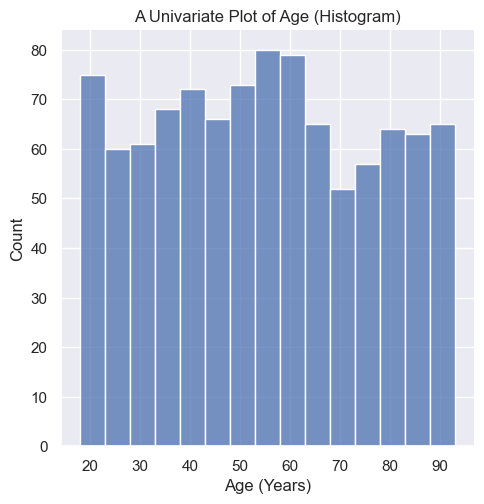

In [33]:
# this cell returns a displot of the Age attribute
# the specified bin-width of 5 gives 15 number of bins in the plot
age_plot = sns.displot(data = new_acw_user_data, x = "Age (Years)", binwidth = 5)
age_plot.set(title = "A Univariate Plot of Age (Histogram)")

#### 2b. Univariate plot of Dependants (Histogram)

In [34]:
# this cell creats the dependant data series
dependants = new_acw_user_data["Dependants"]

In [35]:
# just to confirm there are errors in the dependants column
dependants.isnull().any()

True

In [36]:
# this cell handles the missing data
# I replaced the missing values with "0" which means there are no dependants
dependants.fillna(value = 0, inplace = True)

In [37]:
# just tpo confirm the error in the dependants column has been handled
dependants.isnull().any()

False

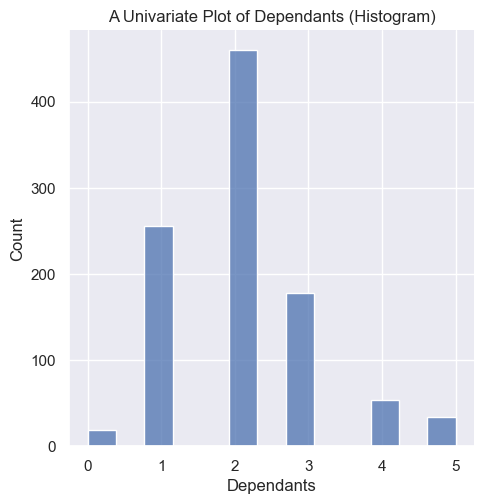

In [38]:
# this cell returns a displot of the Dependants attribute
dependants_plot = sns.displot( data = new_acw_user_data, x = "Dependants").set(title = "A Univariate Plot of Dependants (Histogram)")

#### 2c. Univariate plot of Age (conditioned by Marital Status)

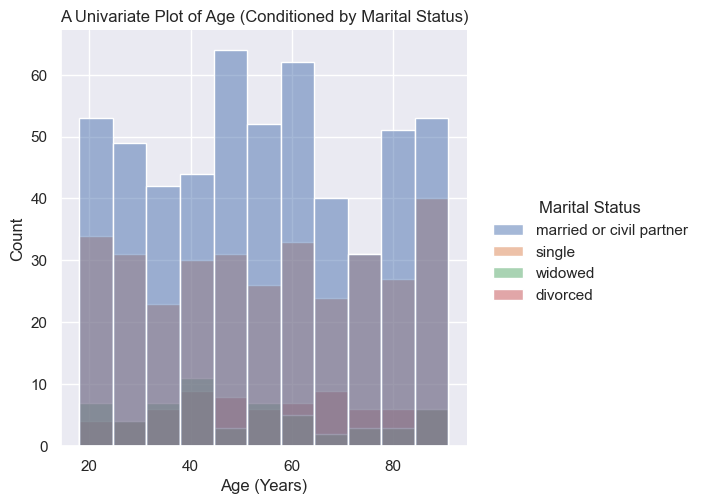

In [39]:
# this cell returns a displot of the Age attribute, segmented by their Marital Status
age_conditioned_plot = sns.displot(data = new_acw_user_data, x = "Age (Years)", hue = "Marital Status")
age_conditioned_plot.set(title = "A Univariate Plot of Age (Conditioned by Marital Status)")

#### 3. Multivariate Plots

#### 3a. Plot of Commuted Distance against Salary

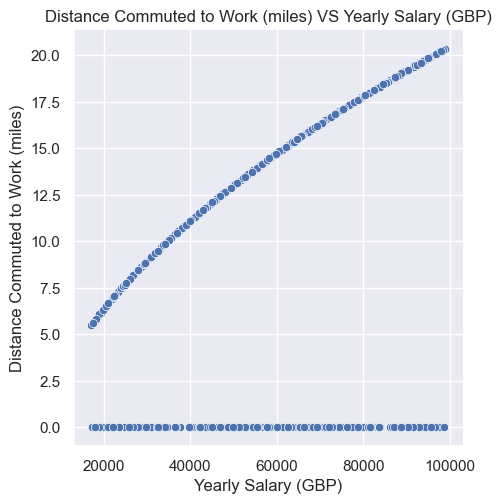

In [40]:
# this cell returns a plot of Communted Distance against Salary
commuted_distance_salary_plot = sns.relplot(data = new_acw_user_data, x = "Yearly Salary (GBP)", 
                                                y = "Distance Commuted to Work (miles)")
commuted_distance_salary_plot.set(title = "Distance Commuted to Work (miles) VS Yearly Salary (GBP)")

#### 3b. Plot of Age against Salary

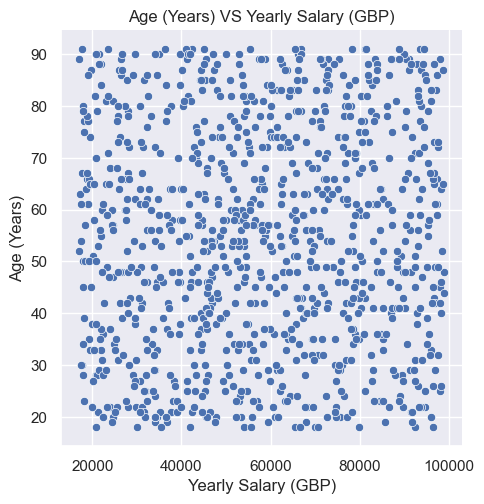

In [41]:
# this cell returns a plot of Age against Salary
age_salary_plot = sns.relplot(data = new_acw_user_data, x = "Yearly Salary (GBP)", y = "Age (Years)")
age_salary_plot.set(title = "Age (Years) VS Yearly Salary (GBP)")

#### 3c. Plot of Age against Salary conditioned by Dependants

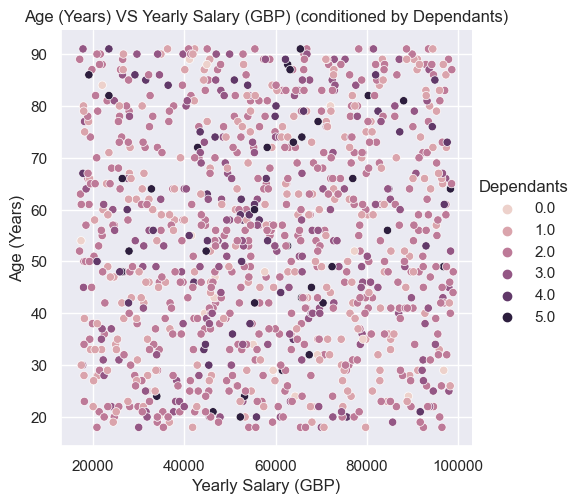

In [42]:
# this cell returns a plot of Age against Salary conditioned by Dependants
age_salary_conditioned_plot = sns.relplot(data = new_acw_user_data, x = "Yearly Salary (GBP)", y = "Age (Years)", hue = "Dependants")
age_salary_conditioned_plot.set(title = "Age (Years) VS Yearly Salary (GBP) (conditioned by Dependants)")

#### 4. Saving the plots

In [43]:
# this is cell saves the plots created above
# it loops through a dictionary "fig_to_save", passing the "savefig" method on it to save all the plots
fig_to_save = {}
fig_to_save["age_plot"] = age_plot
fig_to_save["dependants_plot"] = dependants_plot
fig_to_save["age_conditioned_plot"] = age_conditioned_plot
fig_to_save["commuted_distance_salary_plot"] = commuted_distance_salary_plot
fig_to_save["age_salary_plot"] = age_salary_plot
fig_to_save["age_salary_conditioned_plot"] = age_salary_conditioned_plot

for key, value in fig_to_save.items():
    fig_to_save[key].savefig(key)